In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading dataset
df = pd.read_csv("dataset/insurance.csv")

In [3]:
#top 5 records of dataset
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
#Shape of dataset
df.shape

(1338, 7)

In [5]:
#Information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#Statistical summary of dataset
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [7]:
#Check duplicated values in dataset
df.duplicated().sum()

1

In [8]:
#Here we will drop one duplicated value from dataset.
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
#Check null values in dataset
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [11]:
#There is no missing values in dataset

In [12]:
#Columns of dataset
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [13]:
df['expenses'].value_counts()

expenses
16884.92    1
2117.34     1
2221.56     1
19798.05    1
13063.88    1
           ..
7345.08     1
26109.33    1
28287.90    1
1149.40     1
29141.36    1
Name: count, Length: 1337, dtype: int64

In [14]:
df['age'].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [15]:
df['age'].value_counts()

age
18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

### EDA

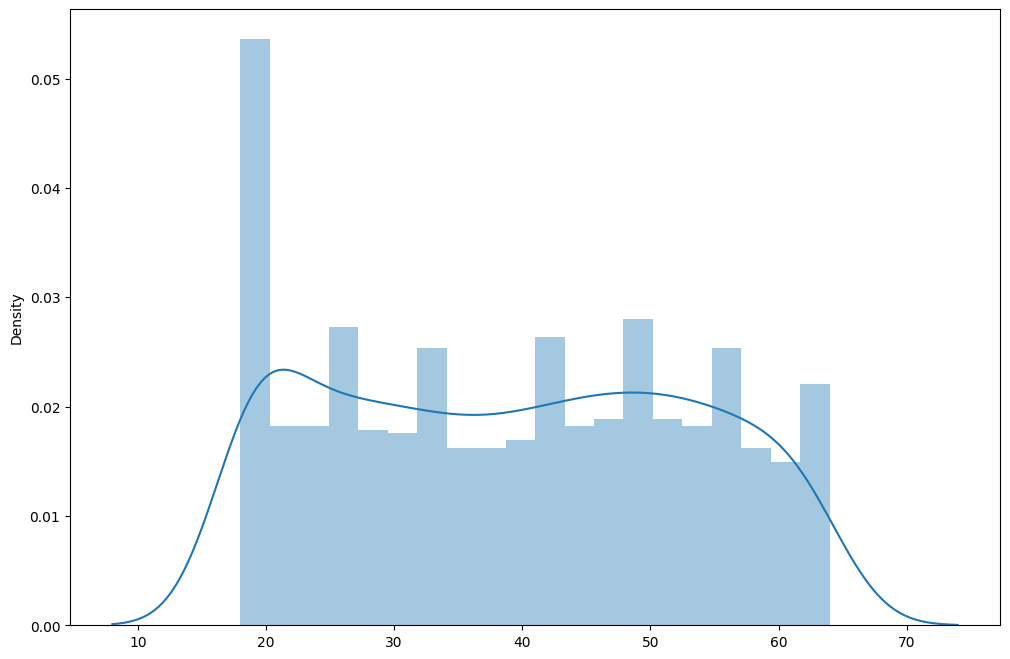

In [16]:
##Distribution of age feature
plt.figure(figsize=(12, 8))
sns.distplot(x=df['age'], bins=20)
plt.show()

In [17]:
#Using function create new feature Age range
def AGE(age):
  if age in range(18,20):
    return '18-20'
  elif age in range(20,30):
    return '20-30'
  elif age in range(30,40):
    return '30-40'
  elif age in range(40,50):
    return '40-50'
  elif age in range(50,60):
    return '50-60'
  else:
    return '60+'

In [18]:
df['Age_range'] = df['age'].apply(AGE)

In [19]:
df.head()

,age,sex,bmi,children,smoker,region,expenses,Age_range
0,19,female,27.9,0,yes,southwest,16884.92,18-20
1,18,male,33.8,1,no,southeast,1725.55,18-20
2,28,male,33.0,3,no,southeast,4449.46,20-30
3,33,male,22.7,0,no,northwest,21984.47,30-40
4,32,male,28.9,0,no,northwest,3866.86,30-40


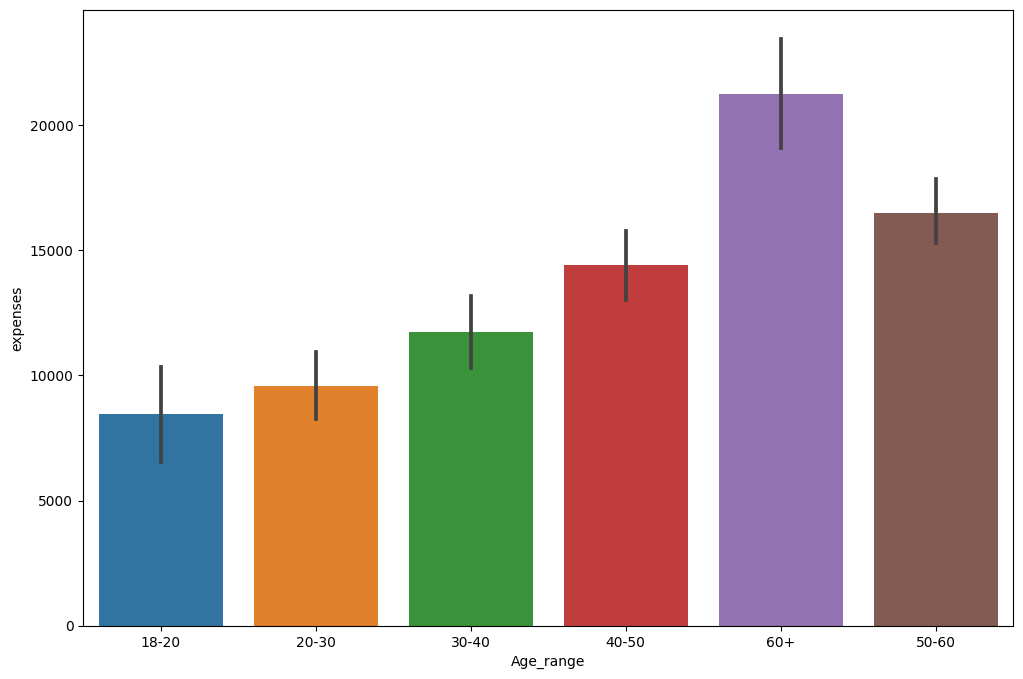

In [20]:
plt.figure(figsize=(12,8))
sns.barplot(x='Age_range', y='expenses', data = df)
plt.show()

### Observation:-
 - The people who have age 60+, medical insurance expenses is higher than other age group of people.
 - Also people who have age between 30-40 and 40-50 , the medical insurance expenses are high and pretty close to each other.

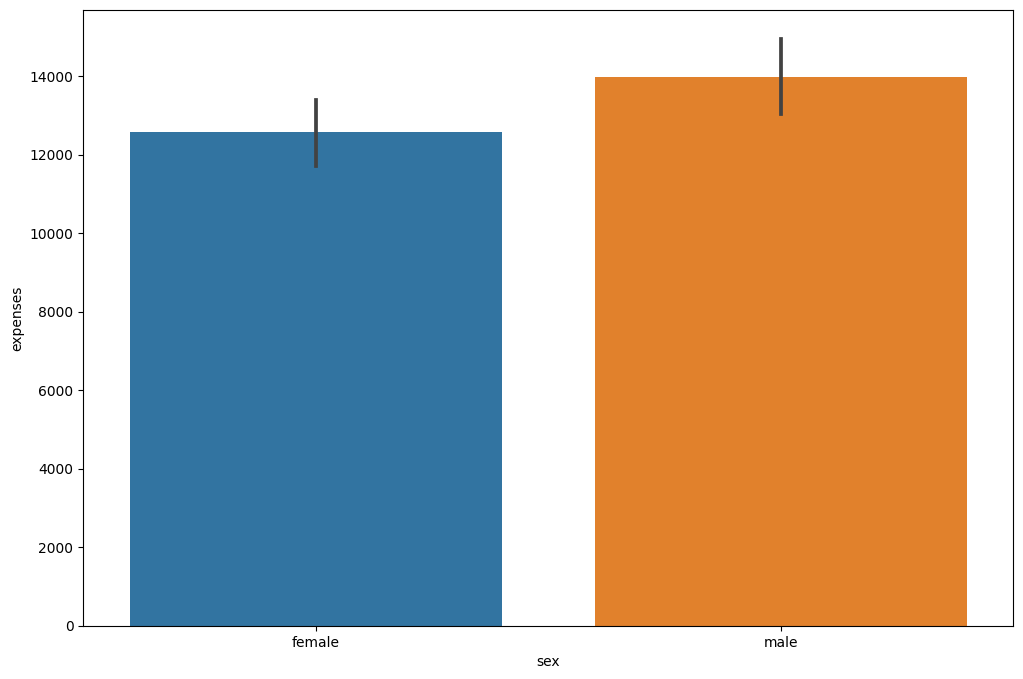

In [21]:
##Relationship between sex vs expenses
plt.figure(figsize=(12,8))
sns.barplot(x='sex', y='expenses', data = df)
plt.show()

### Observation:-
 - From the above plot, we can say that the count of medical insurance expenses for both male and female persons are pretty close to each other.

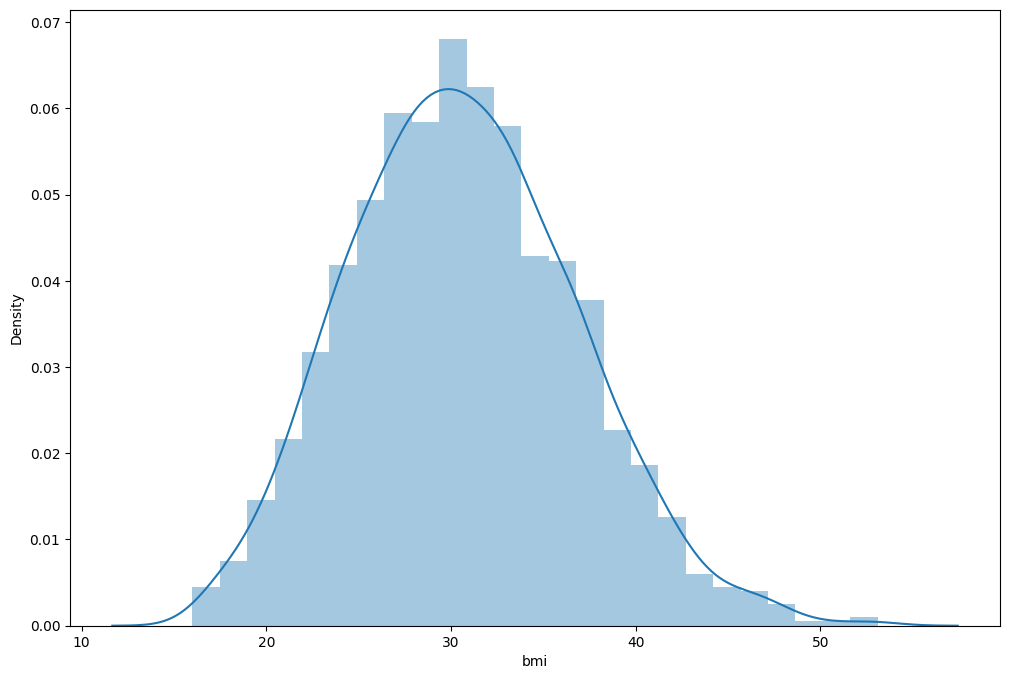

In [22]:
##Distribution of BMI feature
plt.figure(figsize=(12,8))
sns.distplot(df['bmi'])
plt.show()

In [23]:
#Here we create new feature based on the bmi feature using function
def bmi(BMI):
  if BMI<=16.0:
    return "UnderWeight"
  elif BMI<=26.9:
    return "NormalWeight"
  elif BMI<=30.5:
    return "OverWeight"
  else:
    return "Obese"

In [24]:
df['BMI'] = df['bmi'].apply(bmi)

In [25]:
df.head()

,age,sex,bmi,children,smoker,region,expenses,Age_range,BMI
0,19,female,27.9,0,yes,southwest,16884.92,18-20,OverWeight
1,18,male,33.8,1,no,southeast,1725.55,18-20,Obese
2,28,male,33.0,3,no,southeast,4449.46,20-30,Obese
3,33,male,22.7,0,no,northwest,21984.47,30-40,NormalWeight
4,32,male,28.9,0,no,northwest,3866.86,30-40,OverWeight


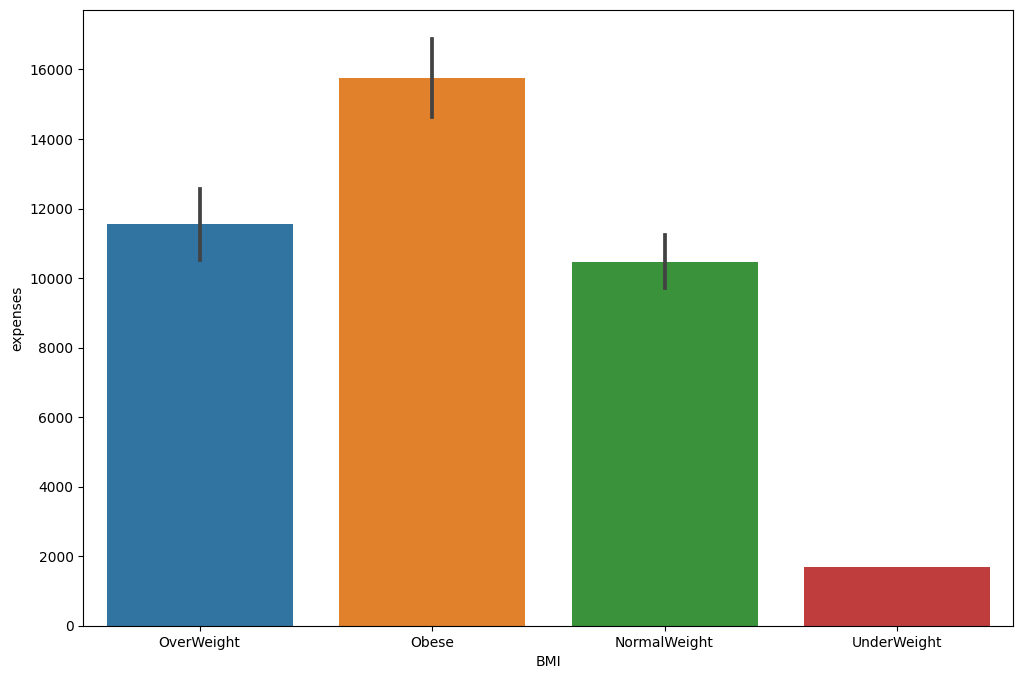

In [26]:
plt.figure(figsize=(12,8))
sns.barplot(x='BMI', y='expenses', data = df)
plt.show()

### Observation:-
 - From the above plot we can say that, the obese people have the highest medical insurance expenses than the other bmi category.
 - The underweight people have the less medical insurance expenses.

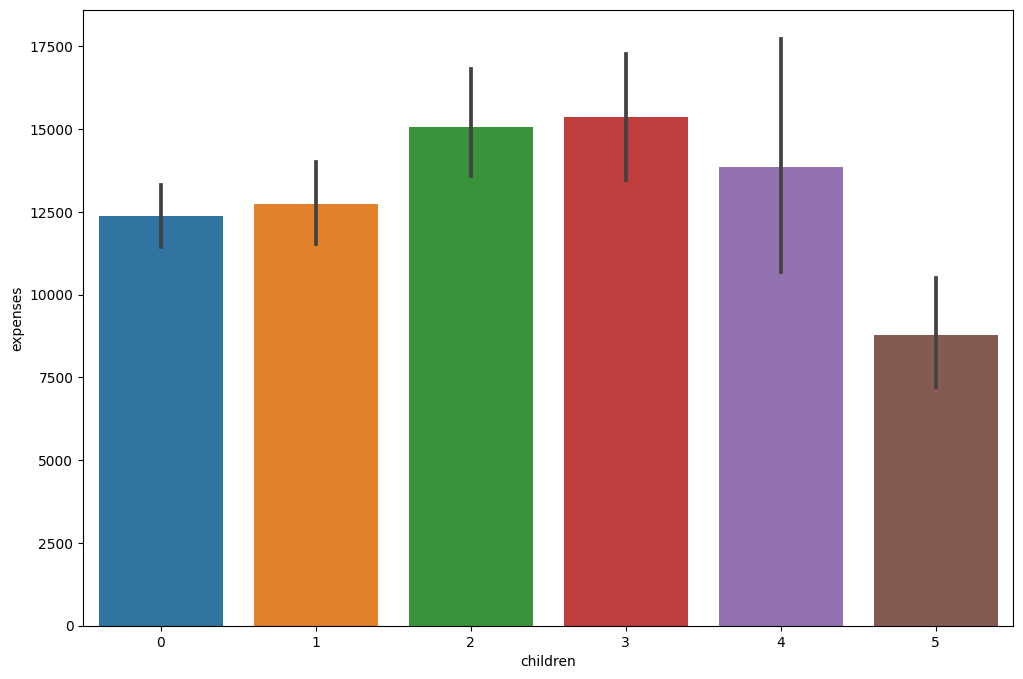

In [27]:
##Relationship between sex vs expenses
plt.figure(figsize=(12,8))
sns.barplot(x='children', y='expenses', data = df)
plt.show()

### Observation:-
 - Here the count of medical insurance expenses for the people who have children 2,3 and 4 are pretty close to each other, and also higher than other people who have more or less children.

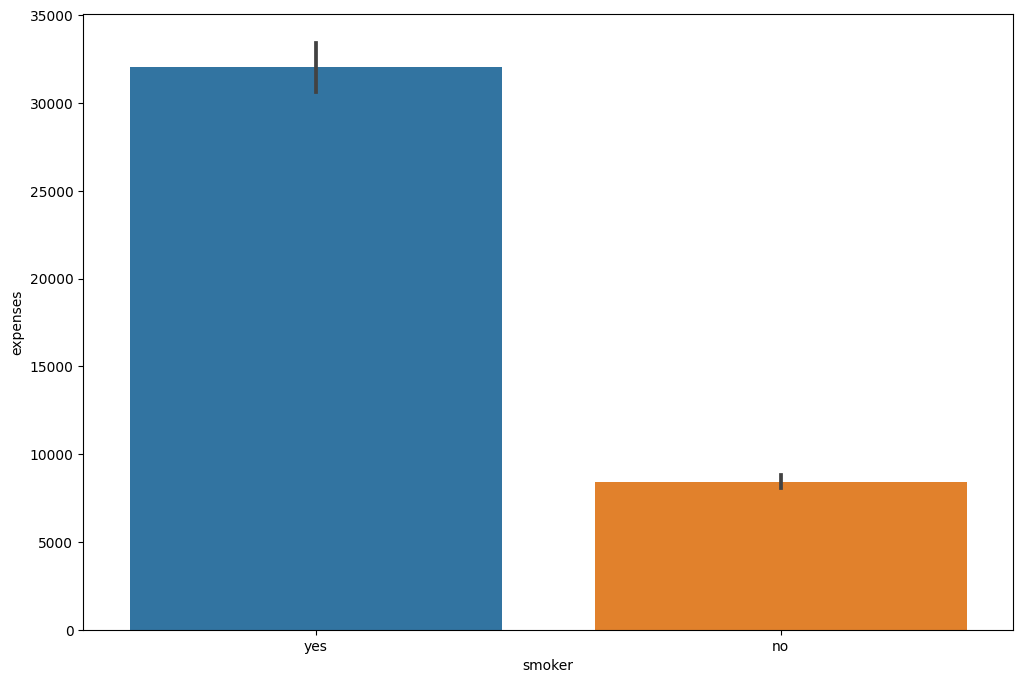

In [28]:
##Relationship between sex vs expenses
plt.figure(figsize=(12,8))
sns.barplot(x='smoker', y='expenses', data = df)
plt.show()

### Observation:-
 - The expenses of medical insurance for smoker people are higher than the non-smoker people.

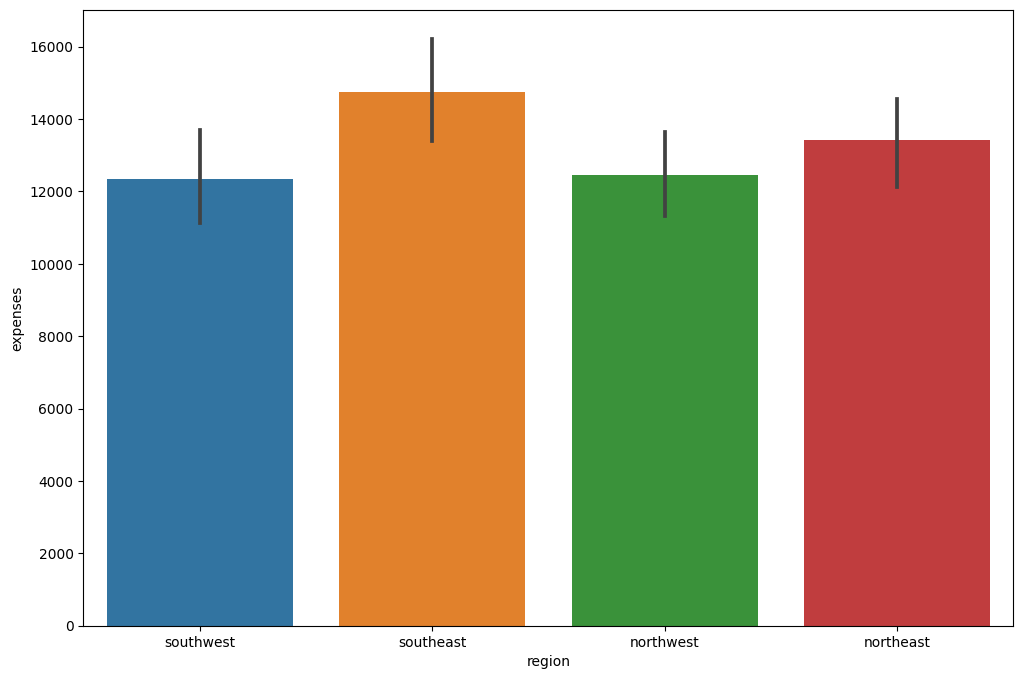

In [29]:
##Relationship between sex vs expenses
plt.figure(figsize=(12,8))
sns.barplot(x='region', y='expenses', data = df)
plt.show()

### Observation:-
 - The expenses of medical insurance for people of southeast region is more than than other regions.
 - Also, people of the southwest and northwest region, the expenses of medical insurance are equal to each other.

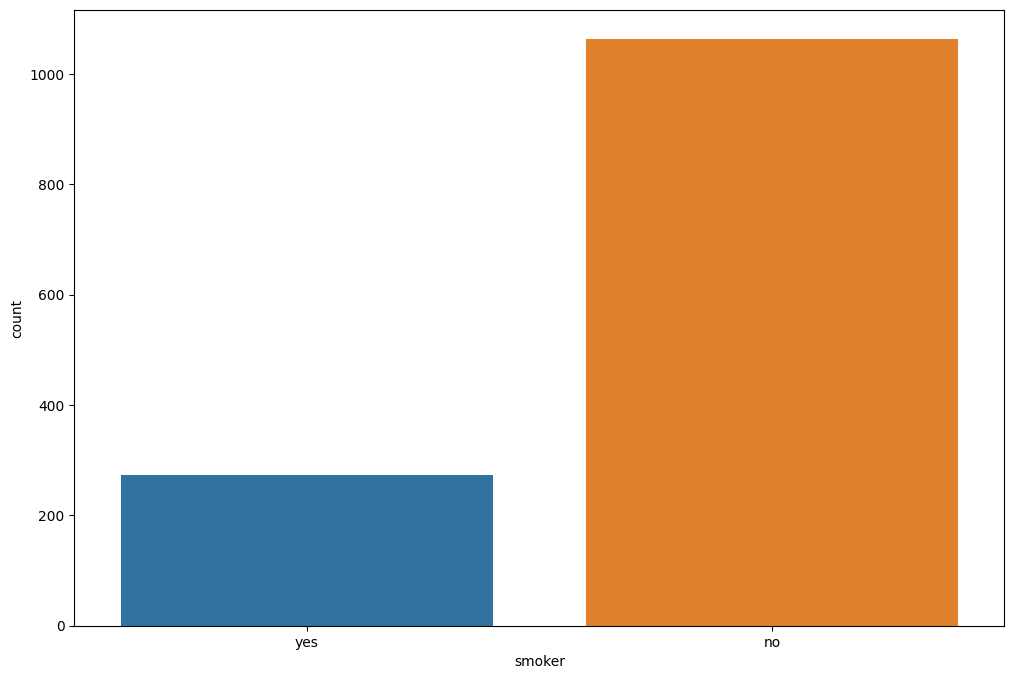

In [30]:
##Relationship between sex vs expenses
plt.figure(figsize=(12,8))
sns.countplot(x='smoker', data = df)
plt.show()

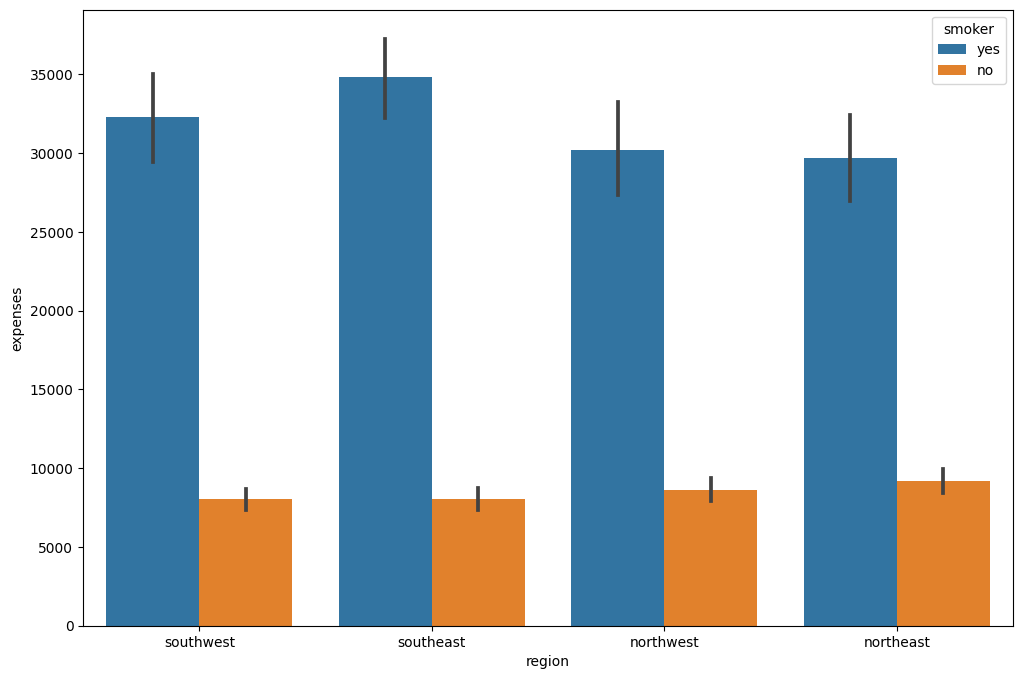

In [31]:
##Relationship between sex vs expenses
plt.figure(figsize=(12,8))
sns.barplot(x='region',y='expenses',hue='smoker', data = df)
plt.show()

### Observaion:-
 - The people of the southeast region have the highest medical insurance expenses as compared to the other regions. 